# Creación de grafos

#### Documentación de grafos usando networkx

Véase [documentación](https://networkx.org/documentation/stable/reference/classes/graph.html)


In [2]:
import networkx as nx

In [3]:
# Se crea un gráfico vacío
G = nx.Graph()

In [6]:
# Muestra los nodos
G.nodes()

NodeView(())

In [9]:
# Muestra los nodos
G.edges()

EdgeView([])

In [10]:
# Agregando un nodo
G.add_node('A')

In [13]:
# Agregando nodos con una lista
G.add_nodes_from(['B', 'C', 'D', 'E'])

In [15]:
# Agregar arista
G.add_edge('A', 'B')

In [17]:
G.add_edges_from([('B', 'C'), ('C', 'A'), ('D', 'E')])

In [18]:
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E')]


## Definiendo nodos con coordenadas

In [60]:
# Agregando un nodo
G.add_node('A', pos=[1, 1])

In [61]:
G.add_nodes_from([('B', {'pos': [0, 0]}),
                  ('C', {'pos': [2, 0.5]}),
                  ('D', {'pos': [4, 1.5]}),
                  ('E', {'pos': [3, -1]})])

In [62]:
print(G.nodes())
print(G.edges())

['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E')]


In [63]:
G.adj

AdjacencyView({'A': {'B': {'weight': 0.5}, 'C': {'weight': 2.5}}, 'B': {'A': {'weight': 0.5}, 'C': {'weight': 1.3}}, 'C': {'B': {'weight': 1.3}, 'A': {'weight': 2.5}}, 'D': {'E': {'weight': 1.0}}, 'E': {'D': {'weight': 1.0}}})

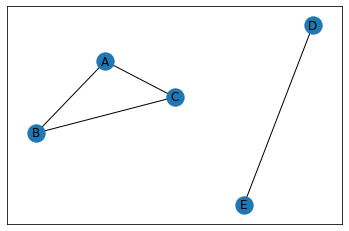

In [74]:
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx(G, pos)

## Definiendo aristas con peso

In [65]:
G.add_edge('A', 'B', weight=0.5)

In [86]:
G.add_edges_from([('B', 'C', {'weight': 1.3}), 
                  ('C', 'A', {'weight': 2.5}), 
                  ('D', 'E', {'weight': 1.0})])

{('A', 'B'): Text(0.5, 0.5, '0.5'),
 ('A', 'C'): Text(1.5, 0.75, '2.5'),
 ('B', 'C'): Text(1.0, 0.25, '1.3'),
 ('D', 'E'): Text(3.5, 0.25, '1.0')}

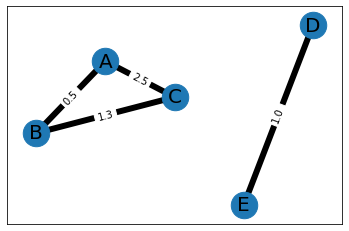

In [81]:
# nodes
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=6)
# labels
# node labels
nx.draw_networkx_labels(G, pos, font_size=20)
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [ ]:
#pos = nx.spring_layout(G)
#pos

### Eliminando aristas

In [87]:
G.remove_edge('D', 'E')

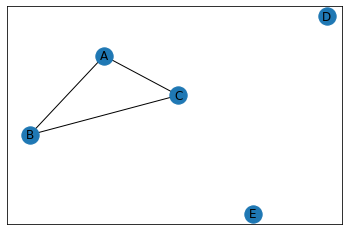

In [99]:
nx.draw_networkx(G, pos)

## Grafo a dataframe

In [95]:
G.adj

AdjacencyView({'A': {'B': {'weight': 0.5}, 'C': {'weight': 2.5}}, 'B': {'A': {'weight': 0.5}, 'C': {'weight': 1.3}}, 'C': {'B': {'weight': 1.3}, 'A': {'weight': 2.5}}, 'D': {}, 'E': {}})

In [93]:
list(G.adjacency())

[('A', {'B': {'weight': 0.5}, 'C': {'weight': 2.5}}),
 ('B', {'A': {'weight': 0.5}, 'C': {'weight': 1.3}}),
 ('C', {'B': {'weight': 1.3}, 'A': {'weight': 2.5}}),
 ('D', {}),
 ('E', {})]

In [97]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,A,B,0.5
1,A,C,2.5
2,B,C,1.3


In [96]:
nx.to_pandas_adjacency(G)

,A,B,C,D,E
A,0.0,0.5,2.5,0.0,0.0
B,0.5,0.0,1.3,0.0,0.0
C,2.5,1.3,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.0
